In [1]:
import litebird_sim as lbs
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams.update({"font.size": 16})

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).


# Single-frequency case

In [2]:
# general
nside = 64
n_months = 3
sim_days = 30 * n_months
channel = "M1-140"
instrument = channel[0] + "FT"
sampling = 1  # this replaces channelinfo.sampling_rate_hz
imo_version = "vPTEP"  # "v1.3"

# simulation parameters
base_path = "./HWP_tutorial"
start_time = "2030-04-01T00:00:00"

# hwp_sys parameters
integrate_in_band = "false"  # watch out, use lower case letters for .toml file
integrate_in_band_solver = "false"  # watch out, use lower case letters for .toml file
built_map_on_the_fly = "true"  # watch out, use lower case letters for .toml file
correct_in_solver = "true"  # watch out, use lower case letters for .toml file

# for scanning, i.e. tod filling
h1 = -0.1  # has to be negative: non-unitary transmission
h2 = -0.2  # has to be negative: non-unitary transmission
z1 = 1e-3 + 1j * 1e-3  # cross-polarization
z2 = 9e-4 + 1j * 1e-3  # cross-polarization
beta = 13  # degrees, phase-shift

# for solver, i.e. map-making (for showing purposes we take them equal to previous ones)
h1s = -0.1
h2s = -0.2
z1s = 1e-3 + 1j * 1e-3
z2s = 9e-4 + 1j * 1e-3
betas = 13

In [3]:
# creation of a parameter (.toml) file
toml_filename = "./HWP_tutorial.toml"
with open(toml_filename, "w") as f:
    f.write("[general]\n")  # --------------- GENERAL ---------------
    f.write("imo_version       = '" + imo_version + "'\n")
    f.write("instrument        = '" + instrument + "'\n")
    f.write("channel           = '" + channel + "'\n")
    f.write("nside             = " + str(nside) + "\n")
    f.write("mission_time_days = '" + str(sim_days) + "'\n\n")

    f.write("[simulation]\n")  # --------------- SIMULATION ---------------
    f.write("base_path  = '" + base_path + "'\n")
    f.write("start_time = '" + start_time + "'\n")
    f.write("duration_s = '" + str(sim_days) + " days'\n")
    f.write("name       = '" + "HWP_tutorial'\n\n")

    f.write("[hwp_sys]\n")  # --------------- HWP_SYS ---------------
    f.write(f"integrate_in_band        = {integrate_in_band} \n")
    f.write(f"integrate_in_band_solver = {integrate_in_band_solver} \n")
    f.write(f"built_map_on_the_fly     = {built_map_on_the_fly} \n")
    f.write(f"correct_in_solver        = {correct_in_solver} \n")
    f.write(f"h1   = {h1}\n")
    f.write(f"h2   = {h2}\n")
    f.write(f"z1   = '{z1}'\n")  # here written as a string since it is complex
    f.write(f"z2   = '{z2}'\n")  # here written as a string since it is complex
    f.write(f"beta = {beta}\n")
    f.write(f"h1s   = {h1s}\n")
    f.write(f"h2s   = {h2s}\n")
    f.write(f"z1s   = '{z1s}'\n")  # here written as a string since it is complex
    f.write(f"z2s   = '{z2s}'\n")  # here written as a string since it is complex
    f.write(f"betas = {betas}\n")
    f.close()

In [4]:
imo = lbs.Imo()
sim = lbs.Simulation(
    parameter_file=toml_filename,
    random_seed=0,
)

/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [5]:
sim.set_scanning_strategy(
    imo_url="/releases/" + imo_version + "/satellite/scanning_parameters/"
)

instrumentinfo = lbs.InstrumentInfo.from_imo(
    imo, "/releases/" + imo_version + f"/satellite/{instrument}/instrument_info"
)

channelinfo = lbs.FreqChannelInfo.from_imo(
    url="/releases/"
    + imo_version
    + "/satellite/"
    + instrument
    + "/"
    + channel
    + "/channel_info",
    imo=imo,
)
hwp_radpsec = lbs.IdealHWP(
    instrumentinfo.hwp_rpm * 2 * np.pi / 60,
).ang_speed_radpsec

/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 129601 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 129601 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [6]:
dets = []

for detname in (
    "001_003_030_00A_140_T",
    "001_003_030_00A_140_B",
):  # we choose the couple of detector at the MFT boresight
    det = lbs.DetectorInfo.from_imo(
        url="/releases/"
        + imo_version
        + "/satellite/"
        + instrument
        + "/"
        + channel
        + "/"
        + detname
        + "/detector_info",
        imo=imo,
    )
    det.sampling_rate_hz = sampling
    dets.append(det)

#### Single-frequency: create input map and fill tod

In [7]:
(obs,) = sim.create_observations(detectors=dets)


quaternion_buffer = np.zeros((obs.n_samples, 1, 4))
pointings = lbs.pointings.get_pointings(
    obs=obs,
    spin2ecliptic_quats=sim.spin2ecliptic_quats,
    bore2spin_quat=instrumentinfo.bore2spin_quat,
    hwp=None,
    quaternion_buffer=quaternion_buffer,
)
del (quaternion_buffer, sim.spin2ecliptic_quats)

In [8]:
Mbsparams = lbs.MbsParameters(
    make_cmb=True,
    seed_cmb=1234,
    cmb_r=0.0,
    make_fg=False,
    gaussian_smooth=True,
    bandpass_int=False,
    maps_in_ecliptic=False,
    nside=nside,
    units="K_CMB",
)

mbs = lbs.Mbs(
    simulation=sim,
    parameters=Mbsparams,
    channel_list=channelinfo,
)
input_map = mbs.run_all()[0][channel]

[2023-12-07 14:56:17,695 INFO MPI#0000] generating and saving cmb simulations
[2023-12-07 14:56:17,703 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2023-12-07 14:56:17,703 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2023-12-07 14:56:17,716 INFO MPI#0000] Access data from /home/serenagiardiello/lbs/litebird_sim/litebird_sim/hwp_sys/examples/HWP_tutorial/cmb/0000/cmb_0000_date_231207.fits
[2023-12-07 14:56:17,717 INFO MPI#0000] NSIDE = 64
[2023-12-07 14:56:17,718 INFO MPI#0000] ORDERING = RING in fits file
[2023-12-07 14:56:17,718 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-12-07 14:56:17,750 INFO MPI#0000] Sigma is 13.079556 arcmin (0.003805 rad) 
[2023-12-07 14:56:17,751 INFO MPI#0000] -> fwhm is 30.800000 arcmin
[2023-12-07 14:56:17,752 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2023-12-07 14:56:17,752 INFO MPI#0000] -> fwhm is 0.000000 arcmin


***************** D
***************** D
***************** D


/tmp/ipykernel_21401/2671604988.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


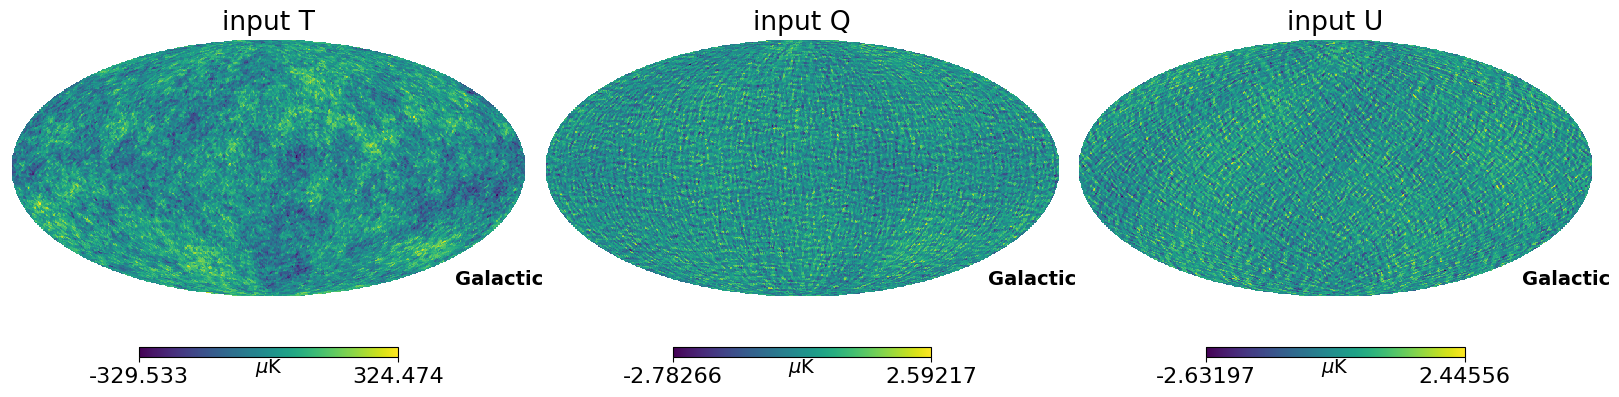

In [9]:
plt.figure(figsize=(16, 10))
hp.mollview(
    input_map[0] * 1e6, unit="$\mu$K", sub=(1, 3, 1), title="input T", coord=["G"]
)
hp.mollview(
    input_map[1] * 1e6, unit="$\mu$K", sub=(1, 3, 2), title="input Q", coord=["G"]
)
hp.mollview(
    input_map[2] * 1e6, unit="$\mu$K", sub=(1, 3, 3), title="input U", coord=["G"]
)
plt.tight_layout()

In [10]:
hwp_sys = lbs.HwpSys(sim)

hwp_sys.set_parameters(
    nside=nside,
    mueller_or_jones="jones",
    maps=input_map,
    Channel=channelinfo,
    #     integrate_in_band=integrate_in_band,
    #     integrate_in_band_solver=integrate_in_band_solver,
    #     correct_in_solver=correct_in_solver,
    #     built_map_on_the_fly=built_map_on_the_fly,
)
# previous 4 lines are non necessary since variables are passed with the toml file
print(
    hwp_sys.integrate_in_band,
    hwp_sys.integrate_in_band_solver,
    hwp_sys.correct_in_solver,
    hwp_sys.built_map_on_the_fly,
)

print("This is a Mueller matrix for a non-ideal HWP.\n\nDiagonal terms (tod filling):")
print(f"mII = {hwp_sys.mII:.1f}, mQQ = {hwp_sys.mQQ:.1f}, mUU = {hwp_sys.mUU:.1f}")
print("Off-diagonal terms (tod filling):")
print(
    f"mIQ = {hwp_sys.mIQ:.1f}, mIU = {hwp_sys.mIU:.1f}, mQU = {hwp_sys.mQU:.1f}, mQI = {hwp_sys.mQI:.1f}, mUI = {hwp_sys.mUI:.1f}, mUQ = {hwp_sys.mUQ:.1f}"
)

print("\n\nDiagonal terms (map-making):")
print(
    f"mIIs = {hwp_sys.mIIs:.1f}, mQQs = {hwp_sys.mQQs:.1f}, mUUs = {hwp_sys.mUUs:.1f}"
)
print("Off-diagonal terms (map-making):")
print(
    f"mIQs = {hwp_sys.mIQs:.1f}, mIUs = {hwp_sys.mIUs:.1f}, mQUs = {hwp_sys.mQUs:.1f}, mQIs = {hwp_sys.mQIs:.1f}, mUIs = {hwp_sys.mUIs:.1f}, mUQs = {hwp_sys.mUQs:.1f}"
)

False False True True
This is a Mueller matrix for a non-ideal HWP.

Diagonal terms (tod filling):
mII = 0.7, mQQ = 0.7, mUU = -0.7
Off-diagonal terms (tod filling):
mIQ = 0.1, mIU = 0.0, mQU = 0.0, mQI = 0.1, mUI = -0.0, mUQ = 0.0


Diagonal terms (map-making):
mIIs = 0.7, mQQs = 0.7, mUUs = -0.7
Off-diagonal terms (map-making):
mIQs = 0.1, mIUs = 0.0, mQUs = 0.0, mQIs = 0.1, mUIs = 0.0, mUQs = 0.0


In [11]:
hwp_sys.fill_tod(
    obs=obs,
    pointings=pointings,  # might be optional if point saved in obs
    hwp_radpsec=hwp_radpsec,
)

/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


#### Single-frequency: building a map using litebird_sim binner

In [12]:
m_lbs = lbs.make_binned_map(nside, [obs])

/tmp/ipykernel_21401/2483131073.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


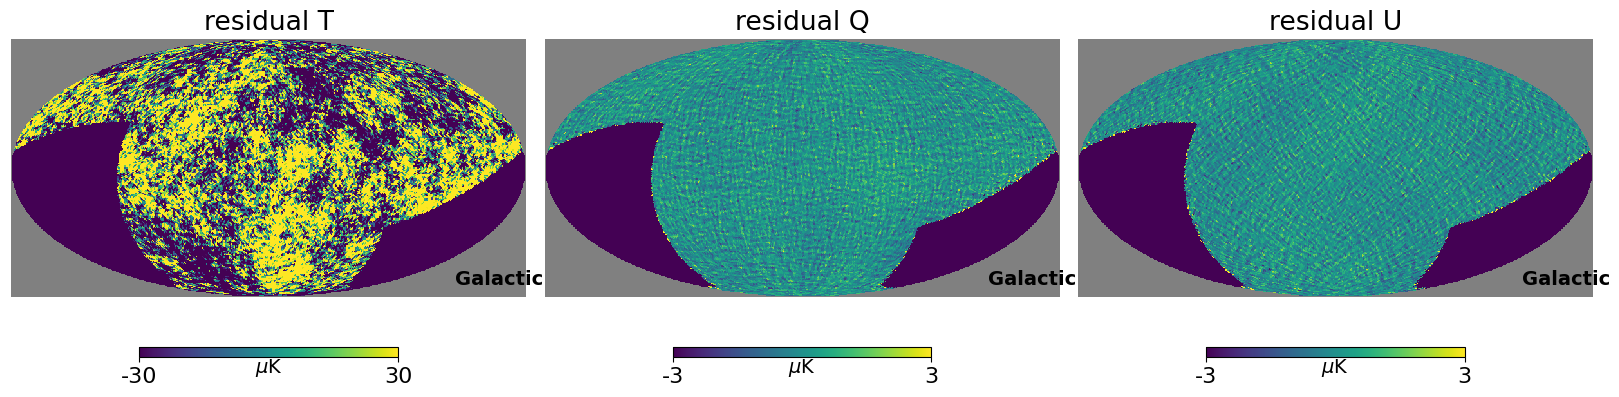

In [13]:
plt.figure(figsize=(16, 10))
ranges = 30
hp.mollview(
    (m_lbs.binned_map[0] - input_map[0]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 1),
    title="residual T",
    coord=["G"],
    min=-ranges,
    max=ranges,
)
hp.mollview(
    (m_lbs.binned_map[1] - input_map[1]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 2),
    title="residual Q",
    coord=["G"],
    min=-ranges * 1e-1,
    max=ranges * 1e-1,
)
hp.mollview(
    (m_lbs.binned_map[2] - input_map[2]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 3),
    title="residual U",
    coord=["G"],
    min=-ranges * 1e-1,
    max=ranges * 1e-1,
)
plt.tight_layout()

#### Single-frequency: building a map "on the fly", i.e. HwpSys map-maker

In [14]:
m_onthefly = hwp_sys.make_map([obs])

/tmp/ipykernel_21401/3291054158.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


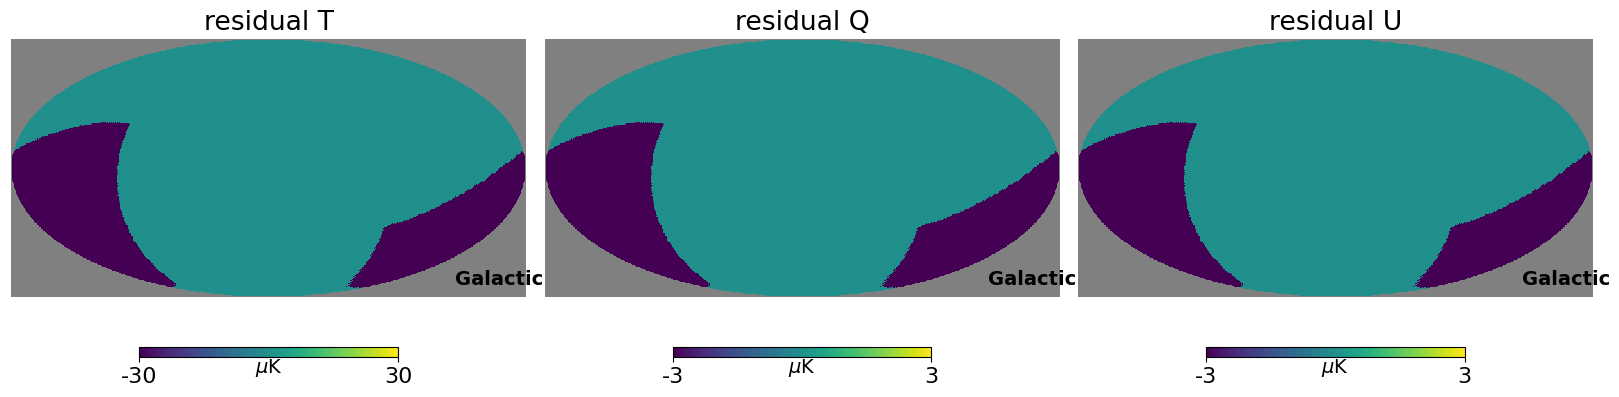

In [15]:
plt.figure(figsize=(16, 10))
ranges = 30
hp.mollview(
    (m_onthefly[0] - input_map[0]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 1),
    title="residual T",
    coord=["G"],
    min=-ranges,
    max=ranges,
)
hp.mollview(
    (m_onthefly[1] - input_map[1]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 2),
    title="residual Q",
    coord=["G"],
    min=-ranges * 1e-1,
    max=ranges * 1e-1,
)
hp.mollview(
    (m_onthefly[2] - input_map[2]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 3),
    title="residual U",
    coord=["G"],
    min=-ranges * 1e-1,
    max=ranges * 1e-1,
)
plt.tight_layout()

## Multi-frequency case (band integration, default top-hat bandpass)

In [16]:
# general
nside = 64
n_months = 3
sim_days = 30 * n_months
channel = "M1-140"
instrument = channel[0] + "FT"
sampling = 1  # this replaces channelinfo.sampling_rate_hz
imo_version = "vPTEP"  # "v1.3"

# simulation parameters
base_path = "./HWP_tutorial"
start_time = "2030-04-01T00:00:00"

# hwp_sys parameters
integrate_in_band = "true"
integrate_in_band_solver = "true"
built_map_on_the_fly = "true"
correct_in_solver = "true"
del hwp_sys


# for band-integration, HWP systematics are passed through txt files
# order of the fields: frequency[GHz] h1 h2 beta[deg] z1 z2
# remember to set integrate_in_band and integrate_in_band_solver to 'true'
band_filename = "./HWP_systematics.txt"  # tod filling
band_filename_solver = "./HWP_systematics.txt"  # map-making

In [17]:
# creation of a parameter (.toml) file
toml_filename = "./HWP_tutorial.toml"
with open(toml_filename, "w") as f:
    f.write("[general]\n")  # --------------- GENERAL ---------------
    f.write("imo_version       = '" + imo_version + "'\n")
    f.write("instrument        = '" + instrument + "'\n")
    f.write("channel           = '" + channel + "'\n")
    f.write("nside             = " + str(nside) + "\n")
    f.write("mission_time_days = '" + str(sim_days) + "'\n\n")

    f.write("[simulation]\n")  # --------------- SIMULATION ---------------
    f.write("base_path  = '" + base_path + "'\n")
    f.write("start_time = '" + start_time + "'\n")
    f.write("duration_s = '" + str(sim_days) + " days'\n")
    f.write("name       = '" + "HWP_tutorial'\n\n")

    f.write("[hwp_sys]\n")  # --------------- HWP_SYS ---------------
    f.write(f"integrate_in_band        = {integrate_in_band}\n")
    f.write(f"integrate_in_band_solver = {integrate_in_band_solver}\n")
    f.write(f"built_map_on_the_fly     = {built_map_on_the_fly}\n")
    f.write(f"correct_in_solver        = {correct_in_solver}\n")
    f.write(
        "band_filename        = '" + band_filename + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write(
        "band_filename_solver = '" + band_filename_solver + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.close()

In [18]:
sim_band_int = lbs.Simulation(
    parameter_file=toml_filename,
    random_seed=0,
)

/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


#### Multi-frequency case: create input maps and fill tod

In [19]:
# emptying the tod
obs.tod = np.zeros_like(obs.tod)

In [20]:
hwp_sys = lbs.HwpSys(sim_band_int)

# in principle one should produce as many input maps as the number of frequencies of the band_width
# for simplicity and to save memory we scan only CMB, so we can re-use the same CMB map for the band_width
hwp_sys.set_parameters(
    nside=nside,
    mueller_or_jones="jones",
    maps=np.array([input_map, input_map, input_map]),
    Channel=channelinfo,
    #     integrate_in_band=integrate_in_band,
    #     integrate_in_band_solver=integrate_in_band_solver,
    #     correct_in_solver=correct_in_solver,
    #     built_map_on_the_fly=built_map_on_the_fly,
)
# same as before for the previous 4 lines
print(
    hwp_sys.integrate_in_band,
    hwp_sys.integrate_in_band_solver,
    hwp_sys.correct_in_solver,
    hwp_sys.built_map_on_the_fly,
)
print(hwp_sys.mII)

True True True True
[1.1887 1.1887 1.1887]


/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/litebird_sim/hwp_sys/hwp_sys.py:876: ComplexWarning: Casting complex values to real discards the imaginary part
  self.freqs = np.array(self.freqs, dtype=float)
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/litebird_sim/hwp_sys/hwp_sys.py:877: ComplexWarning: Casting complex values to real discards the imaginary part
  self.h1 = np.array(self.h1, dtype=float)
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/litebird_sim/hwp_sys/hwp_sys.py:878: ComplexWarning: Casting complex values to real discards the imaginary part
  self.h2 = np.array(self.h2, dtype=float)
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/litebird_sim/hwp_sys/hwp_sys.py:879: ComplexWarning: Casting complex values to real discards the imaginary part
  self.beta = np.array(self.beta, dtype=float)
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/litebird_sim/hw

In [21]:
hwp_sys.fill_tod(
    obs=obs,
    pointings=pointings,  # might be optional if point saved in obs
    hwp_radpsec=hwp_radpsec,
)

#### Multi-frequency: building a map using litebird_sim binner

In [22]:
m_lbs = lbs.make_binned_map(nside, [obs])

/tmp/ipykernel_21401/2483131073.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


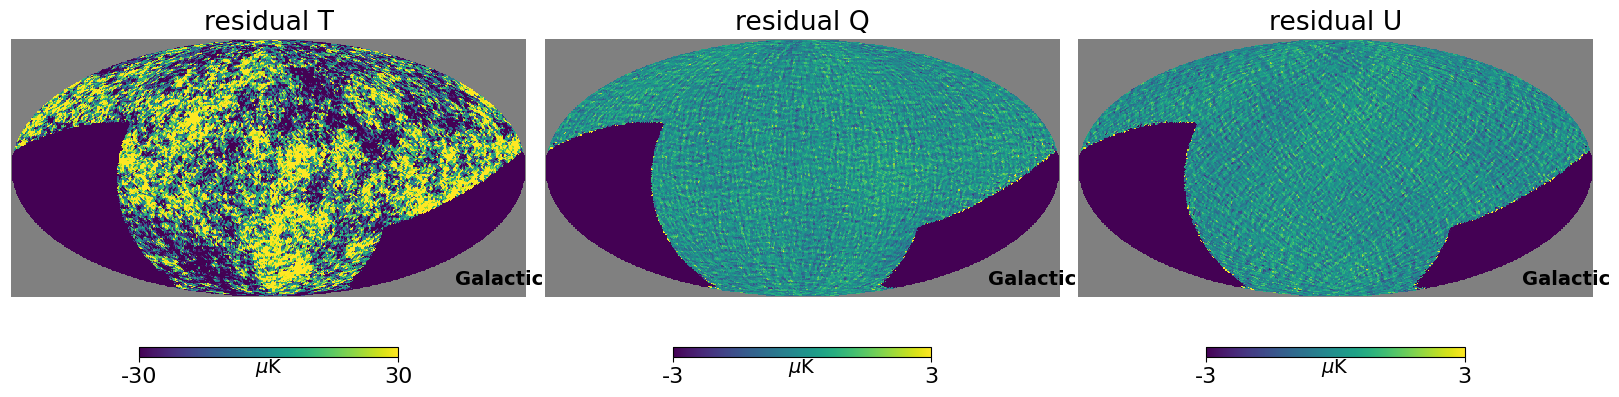

In [23]:
plt.figure(figsize=(16, 10))
ranges = 30
hp.mollview(
    (m_lbs.binned_map[0] - input_map[0]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 1),
    title="residual T",
    coord=["G"],
    min=-ranges,
    max=ranges,
)
hp.mollview(
    (m_lbs.binned_map[1] - input_map[1]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 2),
    title="residual Q",
    coord=["G"],
    min=-ranges * 1e-1,
    max=ranges * 1e-1,
)
hp.mollview(
    (m_lbs.binned_map[2] - input_map[2]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 3),
    title="residual U",
    coord=["G"],
    min=-ranges * 1e-1,
    max=ranges * 1e-1,
)
plt.tight_layout()

#### Multi-frequency: building a map "on the fly", i.e. HwpSys map-maker

In [24]:
m_onthefly = hwp_sys.make_map([obs])

/tmp/ipykernel_21401/3291054158.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


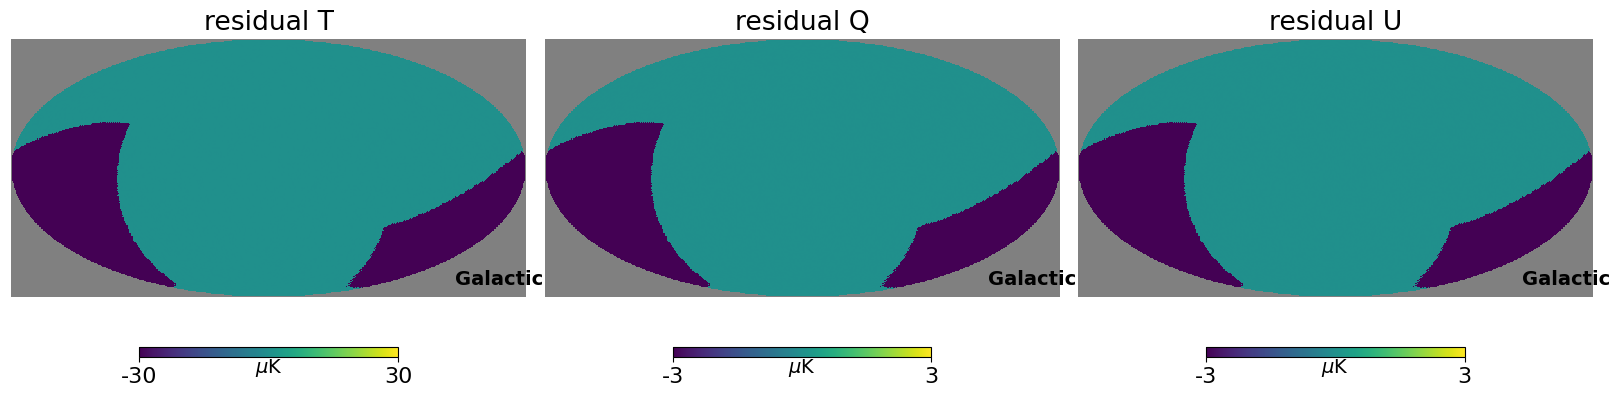

In [25]:
plt.figure(figsize=(16, 10))
ranges = 30
hp.mollview(
    (m_onthefly[0] - input_map[0]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 1),
    title="residual T",
    coord=["G"],
    min=-ranges,
    max=ranges,
)
hp.mollview(
    (m_onthefly[1] - input_map[1]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 2),
    title="residual Q",
    coord=["G"],
    min=-ranges * 1e-1,
    max=ranges * 1e-1,
)
hp.mollview(
    (m_onthefly[2] - input_map[2]) * 1e6,
    unit="$\mu$K",
    sub=(1, 3, 3),
    title="residual U",
    coord=["G"],
    min=-ranges * 1e-1,
    max=ranges * 1e-1,
)
plt.tight_layout()

## How to define more complex bandpass profiles

In [26]:
# general
nside = 64
sim_days = 1
channel = "M1-140"
instrument = channel[0] + "FT"
sampling = 1  # this replaces channelinfo.sampling_rate_hz
imo_version = "vPTEP"  # "v1.3"

# simulation parameters
base_path = "./HWP_tutorial"
start_time = "2030-04-01T00:00:00"

# hwp_sys parameters
integrate_in_band = "true"
integrate_in_band_solver = "true"
built_map_on_the_fly = "true"
correct_in_solver = "true"
del hwp_sys

# for band-integration, HWP systematics are passed through txt files
# order of the fields: frequency[GHz] h1 h2 beta[deg] z1 z2
# remember to set integrate_in_band and integrate_in_band_solver to 'true'
band_filename = "./MFT_100_h_beta_z.txt"  # tod filling
band_filename_solver = "./MFT_100_h_beta_z.txt"  # map-making

# bandpass params
band_low_edge = 95
band_high_edge = 103
bandcenter_ghz = 100

#### let's start with a top-hat

In [27]:
# creation of a parameter (.toml) file
toml_filename = "./HWP_tutorial.toml"
with open(toml_filename, "w") as f:
    f.write("[general]\n")  # --------------- GENERAL ---------------
    f.write("imo_version       = '" + imo_version + "'\n")
    f.write("instrument        = '" + instrument + "'\n")
    f.write("channel           = '" + channel + "'\n")
    f.write("nside             = " + str(nside) + "\n")
    f.write("mission_time_days = '" + str(sim_days) + "'\n\n")

    f.write("[simulation]\n")  # --------------- SIMULATION ---------------
    f.write("base_path  = '" + base_path + "'\n")
    f.write("start_time = '" + start_time + "'\n")
    f.write("duration_s = '" + str(sim_days) + " days'\n")
    f.write("name       = '" + "HWP_tutorial'\n\n")

    f.write("[hwp_sys]\n")  # --------------- HWP_SYS ---------------
    f.write(f"integrate_in_band        = {integrate_in_band}\n")
    f.write(f"integrate_in_band_solver = {integrate_in_band_solver}\n")
    f.write(f"built_map_on_the_fly     = {built_map_on_the_fly}\n")
    f.write(f"correct_in_solver        = {correct_in_solver}\n")
    f.write(
        "band_filename        = '" + band_filename + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write(
        "band_filename_solver = '" + band_filename_solver + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write("[hwp_sys.bandpass]\n")  # bandpass dictionary
    f.write("band_type       = 'top-hat' \n")
    f.write(f"band_low_edge  =  {band_low_edge}\n")
    f.write(f"band_high_edge =  {band_high_edge}\n")
    f.write(f"bandcenter_ghz =  {bandcenter_ghz}\n")
    # you can assign in the same way also the solver bandpass, defining "hwp_sys.bandpass_solver"
    f.close()

We have not created a dictionary for the solver bandpass, it will automatically consider unitary transmission over the whole frequency range in that case. To create one, just repeat the same steps as before but using the key "bandpass_solver" instead of "bandpass"

In [28]:
sim_band_int = lbs.Simulation(
    parameter_file=toml_filename,
    random_seed=0,
)

/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [29]:
hwp_sys = lbs.HwpSys(sim_band_int)

hwp_sys.set_parameters(
    nside=nside,
    mueller_or_jones="jones",
    maps=np.array([input_map, input_map, input_map]),
    Channel=channelinfo,
)

/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/litebird_sim/hwp_sys/hwp_sys.py:876: ComplexWarning: Casting complex values to real discards the imaginary part
  self.freqs = np.array(self.freqs, dtype=float)
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/litebird_sim/hwp_sys/hwp_sys.py:877: ComplexWarning: Casting complex values to real discards the imaginary part
  self.h1 = np.array(self.h1, dtype=float)
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/litebird_sim/hwp_sys/hwp_sys.py:878: ComplexWarning: Casting complex values to real discards the imaginary part
  self.h2 = np.array(self.h2, dtype=float)
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/litebird_sim/hwp_sys/hwp_sys.py:879: ComplexWarning: Casting complex values to real discards the imaginary part
  self.beta = np.array(self.beta, dtype=float)
/home/serenagiardiello/anaconda3/envs/lbs/lib/python3.11/site-packages/litebird_sim/hw

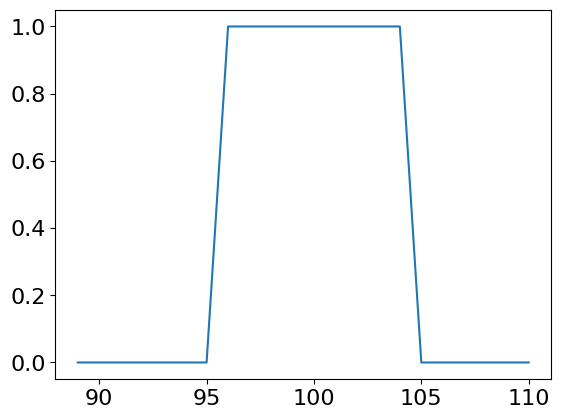

In [30]:
plt.plot(hwp_sys.freqs, hwp_sys.bandpass_profile)

#### let's now consider a Chebyshev bandpass

In [31]:
# creation of a parameter (.toml) file
toml_filename = "./HWP_tutorial.toml"
with open(toml_filename, "w") as f:
    f.write("[general]\n")  # --------------- GENERAL ---------------
    f.write("imo_version       = '" + imo_version + "'\n")
    f.write("instrument        = '" + instrument + "'\n")
    f.write("channel           = '" + channel + "'\n")
    f.write("nside             = " + str(nside) + "\n")
    f.write("mission_time_days = '" + str(sim_days) + "'\n\n")

    f.write("[simulation]\n")  # --------------- SIMULATION ---------------
    f.write("base_path  = '" + base_path + "'\n")
    f.write("start_time = '" + start_time + "'\n")
    f.write("duration_s = '" + str(sim_days) + " days'\n")
    f.write("name       = '" + "HWP_tutorial'\n\n")

    f.write("[hwp_sys]\n")  # --------------- HWP_SYS ---------------
    f.write(f"integrate_in_band        = {integrate_in_band}\n")
    f.write(f"integrate_in_band_solver = {integrate_in_band_solver}\n")
    f.write(f"built_map_on_the_fly     = {built_map_on_the_fly}\n")
    f.write(f"correct_in_solver        = {correct_in_solver}\n")
    f.write(
        "band_filename        = '" + band_filename + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write(
        "band_filename_solver = '" + band_filename_solver + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write("[hwp_sys.bandpass]\n")  # bandpass dictionary
    f.write("band_type       = 'cheby' \n")
    f.write(f"band_low_edge  =  {band_low_edge}\n")
    f.write(f"band_high_edge =  {band_high_edge}\n")
    f.write(f"bandcenter_ghz =  {bandcenter_ghz}\n")
    f.write("band_ripple_dB  = 0.2 \n")
    f.write("band_order      = 3 \n")

    f.close()

In [32]:
sim_band_int = lbs.Simulation(
    parameter_file=toml_filename,
    random_seed=0,
)

In [33]:
hwp_sys = lbs.HwpSys(sim_band_int)

hwp_sys.set_parameters(
    nside=nside,
    mueller_or_jones="jones",
    maps=np.array([input_map, input_map, input_map]),
    Channel=channelinfo,
)

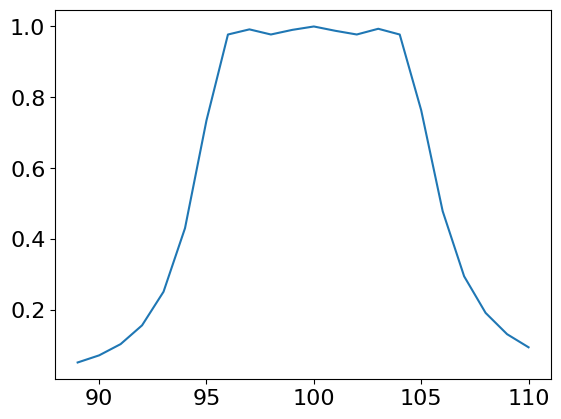

In [34]:
plt.plot(hwp_sys.freqs, hwp_sys.bandpass_profile)

#### a top-hat bandpass with exponentially decaying wings

In [35]:
# creation of a parameter (.toml) file
toml_filename = "./HWP_tutorial.toml"
with open(toml_filename, "w") as f:
    f.write("[general]\n")  # --------------- GENERAL ---------------
    f.write("imo_version       = '" + imo_version + "'\n")
    f.write("instrument        = '" + instrument + "'\n")
    f.write("channel           = '" + channel + "'\n")
    f.write("nside             = " + str(nside) + "\n")
    f.write("mission_time_days = '" + str(sim_days) + "'\n\n")

    f.write("[simulation]\n")  # --------------- SIMULATION ---------------
    f.write("base_path  = '" + base_path + "'\n")
    f.write("start_time = '" + start_time + "'\n")
    f.write("duration_s = '" + str(sim_days) + " days'\n")
    f.write("name       = '" + "HWP_tutorial'\n\n")

    f.write("[hwp_sys]\n")  # --------------- HWP_SYS ---------------
    f.write(f"integrate_in_band        = {integrate_in_band}\n")
    f.write(f"integrate_in_band_solver = {integrate_in_band_solver}\n")
    f.write(f"built_map_on_the_fly     = {built_map_on_the_fly}\n")
    f.write(f"correct_in_solver        = {correct_in_solver}\n")
    f.write(
        "band_filename        = '" + band_filename + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write(
        "band_filename_solver = '" + band_filename_solver + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write("[hwp_sys.bandpass]\n")  # bandpass dictionary
    f.write("band_type       = 'top-hat-exp' \n")
    f.write(f"band_low_edge  =  {band_low_edge}\n")
    f.write(f"band_high_edge =  {band_high_edge}\n")
    f.write(f"bandcenter_ghz =  {bandcenter_ghz}\n")
    f.write("alpha_exp       = 0.9 \n")
    f.write("beta_exp        = 0.9 \n")

    f.close()

In [36]:
sim_band_int = lbs.Simulation(
    parameter_file=toml_filename,
    random_seed=0,
)

In [37]:
hwp_sys = lbs.HwpSys(sim_band_int)

hwp_sys.set_parameters(
    nside=nside,
    mueller_or_jones="jones",
    maps=np.array([input_map, input_map, input_map]),
    Channel=channelinfo,
)

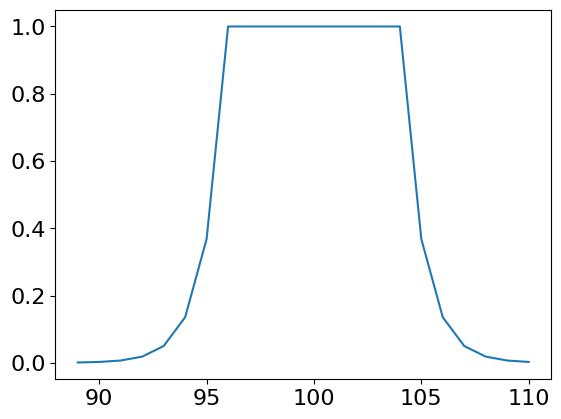

In [38]:
plt.plot(hwp_sys.freqs, hwp_sys.bandpass_profile)

#### and finally a top-hat bandpass with cosine apodization

In [39]:
# creation of a parameter (.toml) file
toml_filename = "./HWP_tutorial.toml"
with open(toml_filename, "w") as f:
    f.write("[general]\n")  # --------------- GENERAL ---------------
    f.write("imo_version       = '" + imo_version + "'\n")
    f.write("instrument        = '" + instrument + "'\n")
    f.write("channel           = '" + channel + "'\n")
    f.write("nside             = " + str(nside) + "\n")
    f.write("mission_time_days = '" + str(sim_days) + "'\n\n")

    f.write("[simulation]\n")  # --------------- SIMULATION ---------------
    f.write("base_path  = '" + base_path + "'\n")
    f.write("start_time = '" + start_time + "'\n")
    f.write("duration_s = '" + str(sim_days) + " days'\n")
    f.write("name       = '" + "HWP_tutorial'\n\n")

    f.write("[hwp_sys]\n")  # --------------- HWP_SYS ---------------
    f.write(f"integrate_in_band        = {integrate_in_band}\n")
    f.write(f"integrate_in_band_solver = {integrate_in_band_solver}\n")
    f.write(f"built_map_on_the_fly     = {built_map_on_the_fly}\n")
    f.write(f"correct_in_solver        = {correct_in_solver}\n")
    f.write(
        "band_filename        = '" + band_filename + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write(
        "band_filename_solver = '" + band_filename_solver + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write("[hwp_sys.bandpass]\n")  # bandpass dictionary
    f.write("band_type       = 'top-hat-cosine' \n")
    f.write(f"band_low_edge  =  {band_low_edge}\n")
    f.write(f"band_high_edge =  {band_high_edge}\n")
    f.write(f"bandcenter_ghz =  {bandcenter_ghz}\n")
    f.write("cosine_apo_length       = 2 \n")

    f.close()

In [40]:
sim_band_int = lbs.Simulation(
    parameter_file=toml_filename,
    random_seed=0,
)

In [41]:
hwp_sys = lbs.HwpSys(sim_band_int)

hwp_sys.set_parameters(
    nside=nside,
    mueller_or_jones="jones",
    maps=np.array([input_map, input_map, input_map]),
    Channel=channelinfo,
)

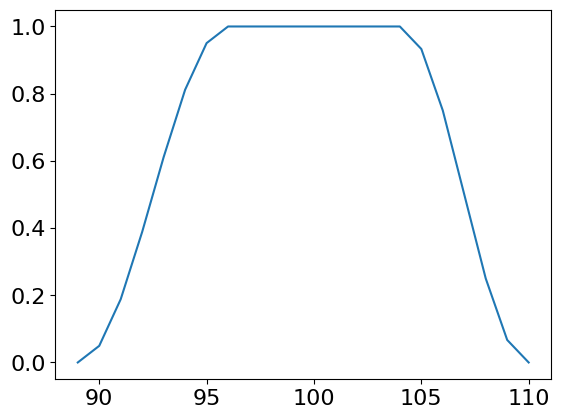

In [42]:
plt.plot(hwp_sys.freqs, hwp_sys.bandpass_profile)

### There is also the possilibity to read a bandpass profile from file. Let's first save the last bandpass profile to a  .txt file

In [43]:
np.savetxt(
    "./example_bandpass.txt", np.column_stack((hwp_sys.freqs, hwp_sys.bandpass_profile))
)

In [44]:
# creation of a parameter (.toml) file
toml_filename = "./HWP_tutorial.toml"
with open(toml_filename, "w") as f:
    f.write("[general]\n")  # --------------- GENERAL ---------------
    f.write("imo_version       = '" + imo_version + "'\n")
    f.write("instrument        = '" + instrument + "'\n")
    f.write("channel           = '" + channel + "'\n")
    f.write("nside             = " + str(nside) + "\n")
    f.write("mission_time_days = '" + str(sim_days) + "'\n\n")

    f.write("[simulation]\n")  # --------------- SIMULATION ---------------
    f.write("base_path  = '" + base_path + "'\n")
    f.write("start_time = '" + start_time + "'\n")
    f.write("duration_s = '" + str(sim_days) + " days'\n")
    f.write("name       = '" + "HWP_tutorial'\n\n")

    f.write("[hwp_sys]\n")  # --------------- HWP_SYS ---------------
    f.write(f"integrate_in_band        = {integrate_in_band}\n")
    f.write(f"integrate_in_band_solver = {integrate_in_band_solver}\n")
    f.write(f"built_map_on_the_fly     = {built_map_on_the_fly}\n")
    f.write(f"correct_in_solver        = {correct_in_solver}\n")
    f.write(
        "band_filename        = '" + band_filename + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write(
        "band_filename_solver = '" + band_filename_solver + "'\n"
    )  # FUNDAMENTAL FOR READING HWP SYSTEMATICS PARAMETERS
    f.write("[hwp_sys.bandpass]\n")  # bandpass dictionary
    f.write("bandpass_file       = './example_bandpass.txt' \n")
    f.write("[hwp_sys.bandpass_solver]\n")  # bandpass solver dictionary
    f.write("bandpass_file       = './example_bandpass.txt' \n")
    f.close()

In [45]:
sim_band_int = lbs.Simulation(
    parameter_file=toml_filename,
    random_seed=0,
)

In [46]:
hwp_sys = lbs.HwpSys(sim_band_int)

hwp_sys.set_parameters(
    nside=nside,
    mueller_or_jones="jones",
    maps=np.array([input_map, input_map, input_map]),
    Channel=channelinfo,
)

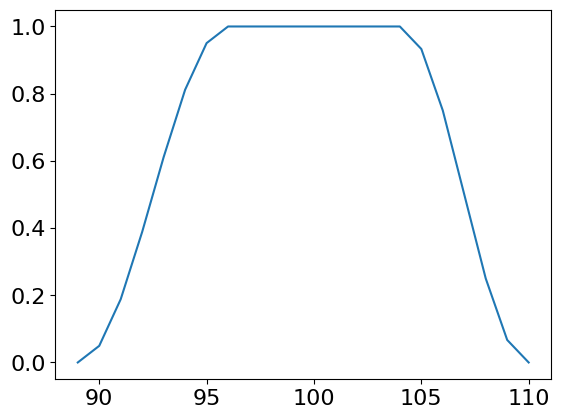

In [47]:
plt.plot(hwp_sys.freqs, hwp_sys.bandpass_profile)

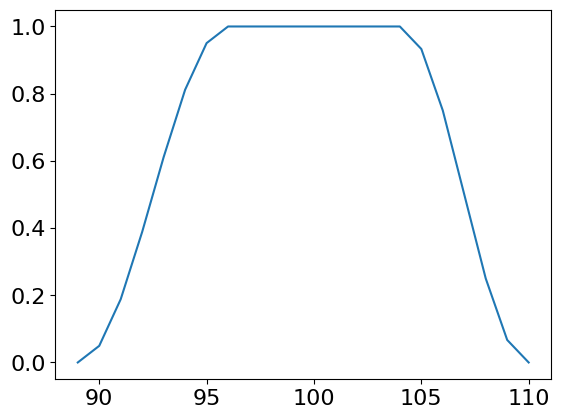

In [48]:
plt.plot(hwp_sys.freqs, hwp_sys.bandpass_profile_solver)